In [25]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install spikeinterface

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in /gpfs/home/gmorto/.local/lib/python3.8/site-packages (20.2.2)
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 512 kB 8.6 MB/s eta 0:00:01
Using legacy 'setup.py install' for brian2, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
Using legacy 'setup.py install' for mpmath, since package 'wheel' is not installed.
    Running setup.py install for mpmath ... done
    Running setup.py install for future ... done
    Running setup.py install for brian2 ... done


In [7]:
import spikeinterface.widgets as sw
import spikeinterface.extractors as se
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## JASON LOOK HERE

Spike clusters (sc) and spike times (st) are what you for the waveform raster

In [8]:
PATH = '/active/ramirez_j/ramirezlab/nbush/projects/dynaresp/data/processed/m2020-12/m202012_g11/m202012_g11_imec0'
amp = np.load(f'{PATH}/amplitudes.npy')
st = np.load(f'{PATH}/spike_times.npy')
sc = np.load(f'{PATH}/spike_clusters.npy')
pos = np.load(f'{PATH}/channel_positions.npy')

In [ ]:
df = pd.DataFrame()
df['amp'] = amp.ravel()
df['sc'] = sc
df['st'] = st

In [ ]:
metrics = pd.read_csv(f'{PATH}/cluster_metrics.csv',index_col=0)

In [ ]:
plt.hist(metrics.d_prime);

In [ ]:
pos[-5:]

In [ ]:
df2 = pd.DataFrame()
df2['pos'] = pos
df2.head()

In [ ]:
df.head()

In [ ]:
df.sort_values('sc')

In [ ]:
df.groupby('sc').mean()['amp']

In [ ]:
metrics.head()

In [ ]:
plt.plot(metrics.silhouette_score,metrics.d_prime,'.')

In [ ]:
wvfm = np.load(f'{PATH}/mean_waveforms.npy')

In [ ]:
wvfm.shape

In [ ]:
plt.plot(wvfm[100,:,:].T,'k')

In [ ]:
plt.pcolormesh(wvfm[100,:,:])
plt.ylim([300,350])
plt.colorbar()

In [ ]:
wvfm_metrics = pd.read_csv(f'{PATH}/waveform_metrics.csv',index_col=0)
wvfm_metrics

In [ ]:
metrics

In [4]:
import sys
sys.path.append('../')
import data

In [10]:
s_dict = data.create_spike_dict(PATH)

In [12]:
s_dict[0]

{'ts': array([8.38324391e-02, 1.76398118e-01, 1.84731363e-01, ...,
        2.95656013e+02, 2.95767978e+02, 2.95863844e+02]),
 'amp': array([22.22412872, 22.69145393, 21.64870262, ..., 20.9372139 ,
        22.97823334, 19.97419357]),
 'label': 'good',
 'pk_channel': 8,
 'depth': 80.0,
 'n_spikes': 2465,
 'mean_amp': 20.738307606230883}

In [18]:
ISI  = np.diff(s_dict[20]['ts'])

(array([ 4.,  4.,  2.,  0.,  5.,  2.,  6.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,
         5.,  6.,  4.,  3.,  3.,  4.,  0.,  1.,  1.,  8., 11., 11., 11.,
        34., 92., 62., 21., 18., 12., 13., 10., 17., 10., 12.,  7.,  8.,
         3.,  9.,  3.,  2.,  1.,  1.,  1.,  1.,  1.]),
 array([-8.51720386e+00, -8.41810378e+00, -8.31900370e+00, -8.21990362e+00,
        -8.12080354e+00, -8.02170346e+00, -7.92260338e+00, -7.82350330e+00,
        -7.72440322e+00, -7.62530315e+00, -7.52620307e+00, -7.42710299e+00,
        -7.32800291e+00, -7.22890283e+00, -7.12980275e+00, -7.03070267e+00,
        -6.93160259e+00, -6.83250251e+00, -6.73340243e+00, -6.63430235e+00,
        -6.53520228e+00, -6.43610220e+00, -6.33700212e

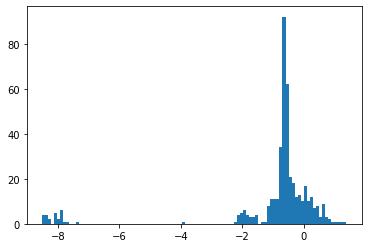

In [22]:
plt.hist(np.log(ISI),100)